In [2]:
#Import dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base 
from sqlalchemy.orm import Session 
from sqlalchemy import create_engine 
base = automap_base()

In [3]:
#Create an engine, figure out schema, open a session and connect Python to the sqllite database
engine = create_engine(f'sqlite:///dow.sqlite')
base.prepare(autoload_with=engine)
session = Session(bind=engine)
connection = engine.connect()

In [4]:
#Get the keys
base.classes.keys()

['dow']

In [5]:
#Read sql data using Pandas
import pandas as pd 
df = pd.read_sql('SELECT * FROM dow',connection)
df.head()

,id,quarter,stock,date,open_price,high_price,low_price,close_price,volume,percent_change
0,1,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,None
1,2,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,None
2,3,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,None
3,4,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,None
4,5,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,None


In [11]:
#Create a new columns year, month and day 
import datetime as dt 
df['date'] = pd.to_datetime(df['date'])
df['Day'] = df['date'].dt.strftime('%d')
df['Month'] = df['date'].dt.strftime('%m')
df['Year'] = df['date'].dt.strftime('%Y')


df.head()

,id,quarter,stock,date,open_price,high_price,low_price,close_price,volume,percent_change,Month,Day,Year
0,1,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,None,01,07,2011
1,2,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,None,01,14,2011
2,3,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,None,01,21,2011
3,4,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,None,01,28,2011
4,5,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,None,02,04,2011


In [16]:
#Find the highest and lowest price for IBM stock after 2011-05-11
date = '2011-05-31'
df_IBM = df.loc[(df['stock']=='IBM')&(df['date']>date)]
highest_IBM_price = df_IBM['high_price'].max()
lowest_IBM_price = df_IBM['low_price'].min()
print(f'The highest IBM price after 2011-05-31 is {highest_IBM_price}')
print(f'The lowest IBM price after 2011-05-31 is {lowest_IBM_price}')


The highest IBM price after 2011-05-31 is 169.89
The lowest IBM price after 2011-05-31 is 161.52


In [22]:
#Find the row where the IBM was the highest after 2011-05-31
IBM_lowest_price_date = df_IBM.loc[df_IBM['high_price']==highest_IBM_price]
IBM_lowest_price_date

,id,quarter,stock,date,open_price,high_price,low_price,close_price,volume,percent_change,Month,Day,Year
525,526,2,IBM,2011-06-03,168.44,169.89,164.13,165.05,23349972,None,06,03,2011


In [56]:
#Group by stock/month and calculate the avg of the high and low 
stock_high_low_by_month = df.groupby(['stock']).mean(['high_price','low_price']).reset_index()
stock_high_low_by_month_df = stock_high_low_by_month.set_index('stock')
stock_high_low_by_month_df_1 = stock_high_low_by_month_df[['high_price','low_price']]

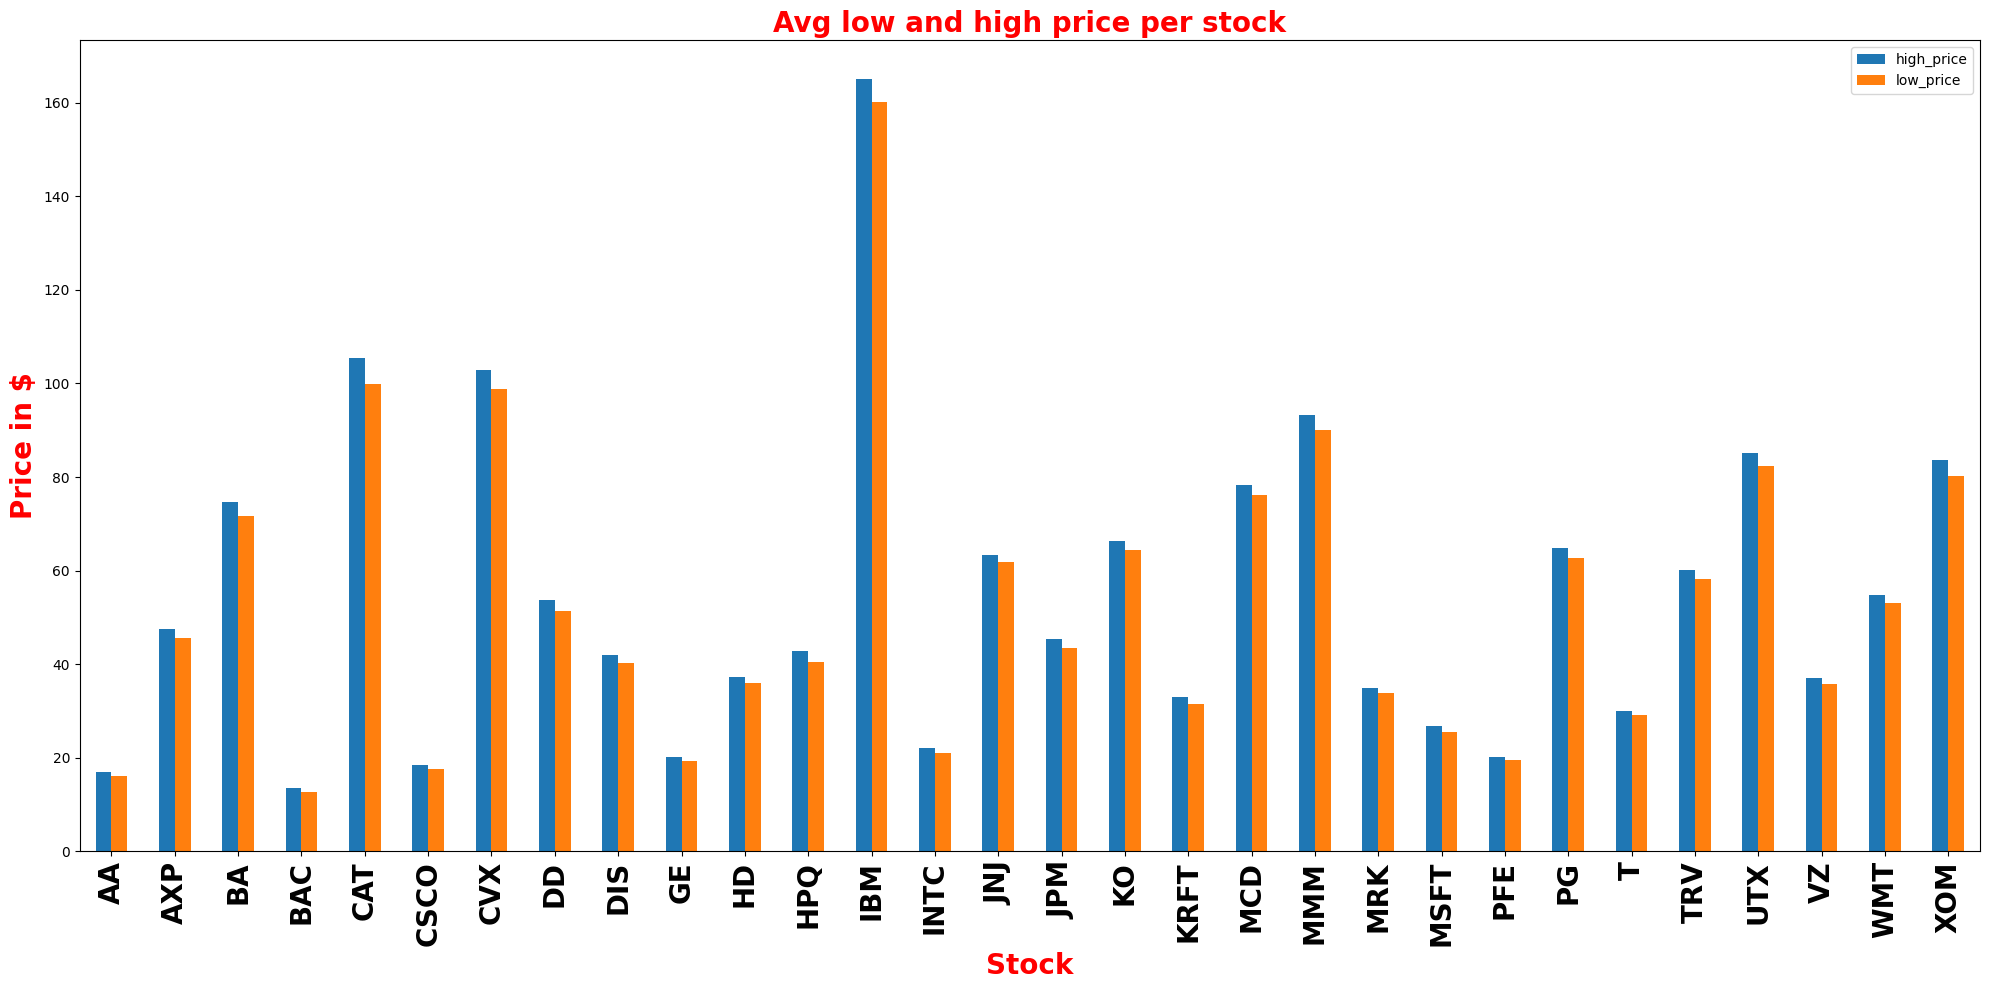

In [68]:
#Plot a bar graph that shows the avg high and low price for each stock for comparison 
import matplotlib.pyplot as plt 
graph = stock_high_low_by_month_df_1.plot(kind='bar',figsize=(20,10))
plt.xticks(fontsize=20,fontweight='bold')
plt.title('Avg low and high price per stock',color='r',fontsize=20,fontweight='bold')
plt.ylabel('Price in $',fontsize=20,fontweight='bold',color='r')
plt.xlabel('Stock',fontsize=20,fontweight='bold',color='r')
plt.tight_layout()
plt.show()